### Import libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

### Some information about the dataset

- **Sex**: Represents the sex of the abalone (M - Male, F - Female, I - Infant or Immature, this category is used to denote abalones that are too young to be accurately classified as male or female)
- **Length**: Indicates the length of the abalone.
- **Diameter**: Indicates the diameter of the abalone.
- **Height**: Indicates the height of the abalone.
- **Whole weight**: Represents the whole weight of the abalone.
- **Shucked weight**: Represents the shucked weight of the abalone.
- **Viscera weight**: Represents the viscera weight of the abalone.
- **Shell weight**: Represents the shell weight of the abalone.
- **Rings**: Indicates the number of rings on the abalone, which can be used to estimate its age.

In [5]:
df_train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [13]:
df_train.shape

(90615, 9)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 8.9+ MB


In [21]:
df = df_train.copy()

## EDA

In [22]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [23]:
df.describe(include = 'all')

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,NaN,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,NaN,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000


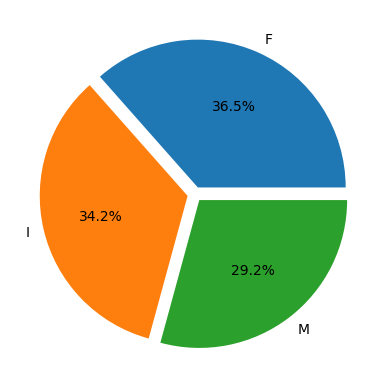

In [69]:
plt.pie(x = df['Sex'].value_counts(), labels = df['Sex'].unique(), autopct='%1.1f%%', explode=[0.05,0.05,0.05])
plt.show()

<AxesSubplot: xlabel='Sex', ylabel='count'>

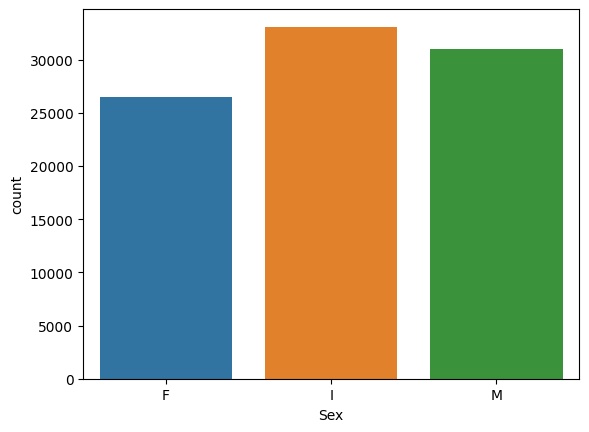

In [24]:
sns.countplot(data = df, x = 'Sex')

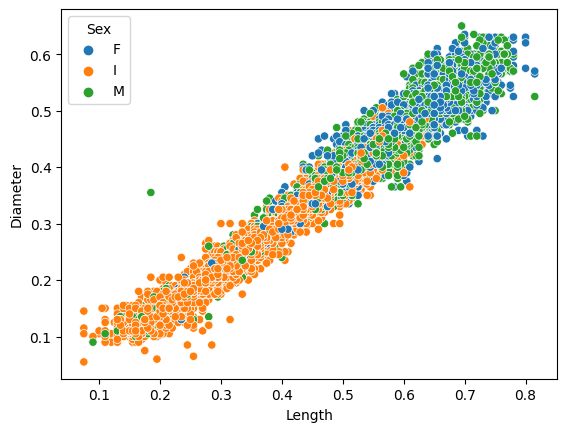

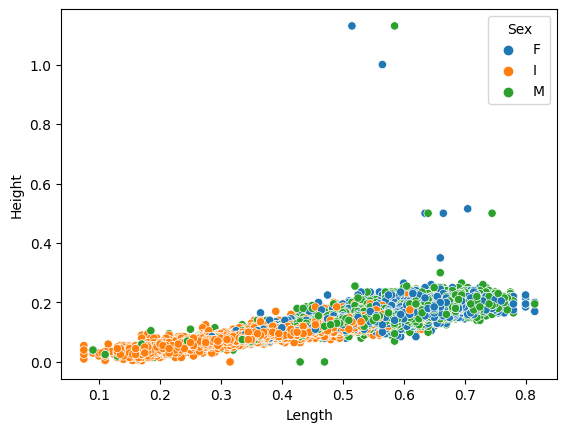

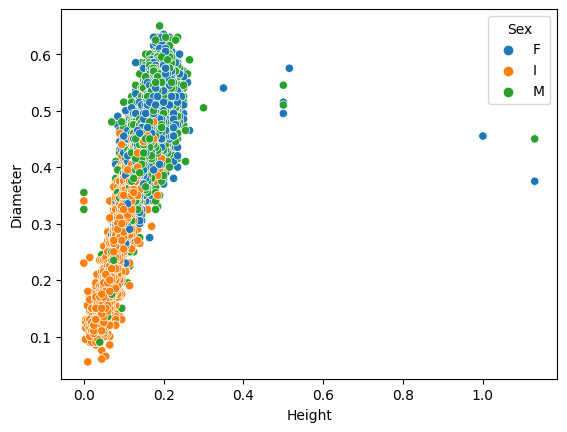

In [29]:
sns.scatterplot(data = df, x = 'Length', y = 'Diameter', hue='Sex')
plt.show()
sns.scatterplot(data = df, x = 'Length', y = 'Height', hue='Sex')
plt.show()
sns.scatterplot(data = df, x = 'Height', y = 'Diameter', hue='Sex')
plt.show()

In [35]:
numerical_cols = df.drop(columns = 'Rings').select_dtypes(exclude = 'object').columns
categorical_cols = df.select_dtypes(include = 'object').columns

print(numerical_cols)
print(categorical_cols)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'],
      dtype='object')
Index(['Sex'], dtype='object')


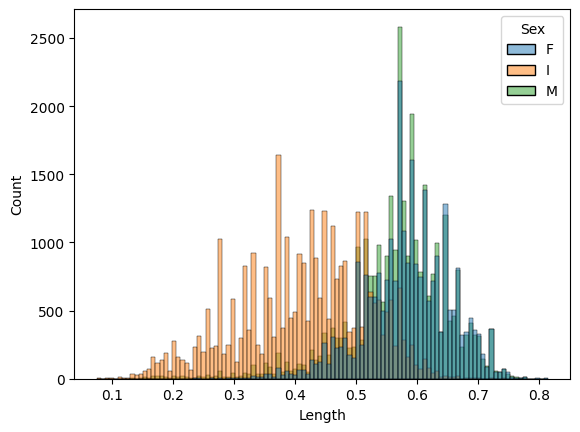

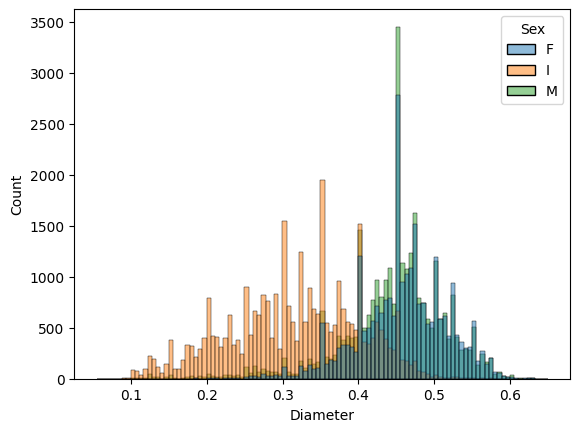

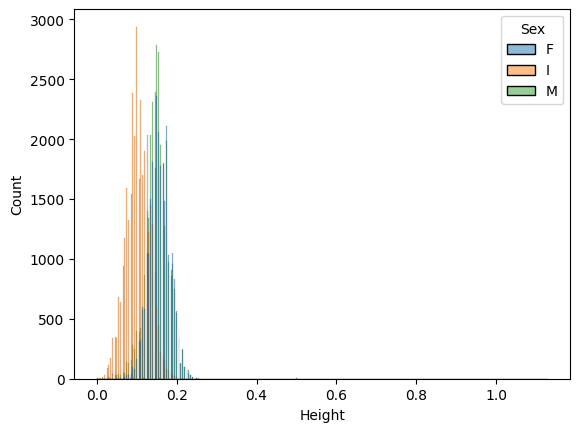

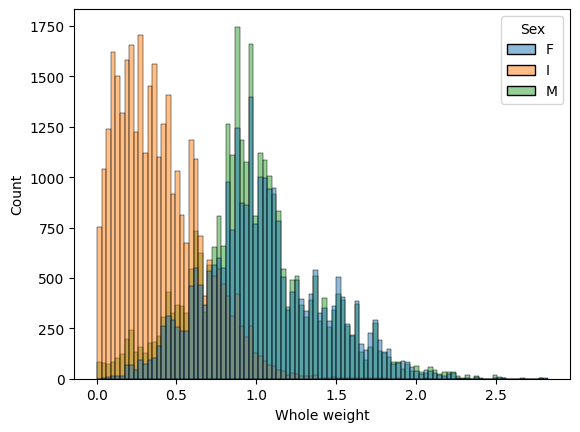

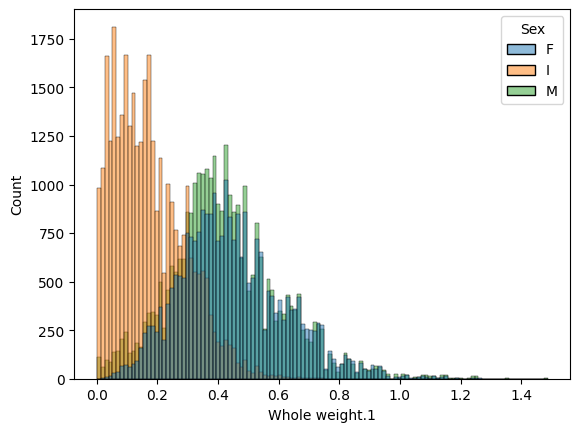

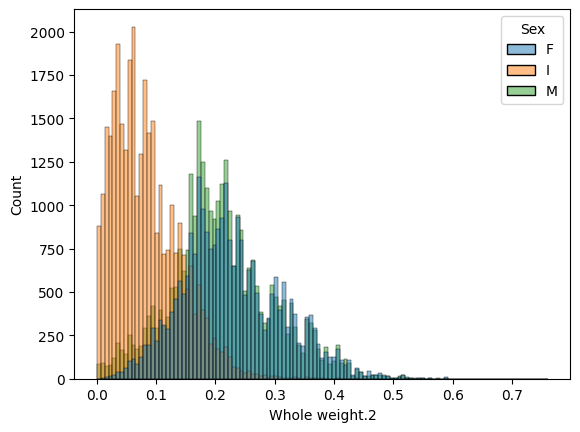

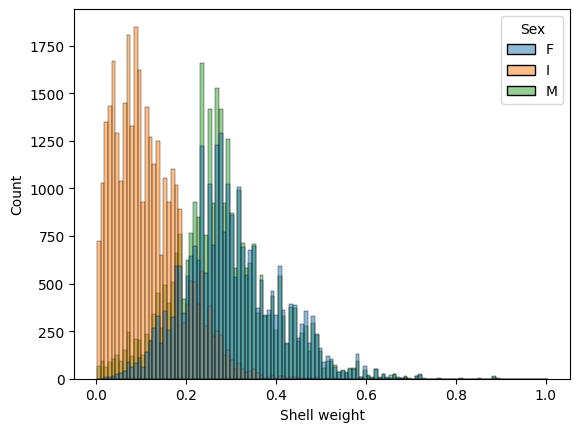

In [38]:
for col in numerical_cols:
    sns.histplot(data = df, x = col, hue = 'Sex')
    plt.show()

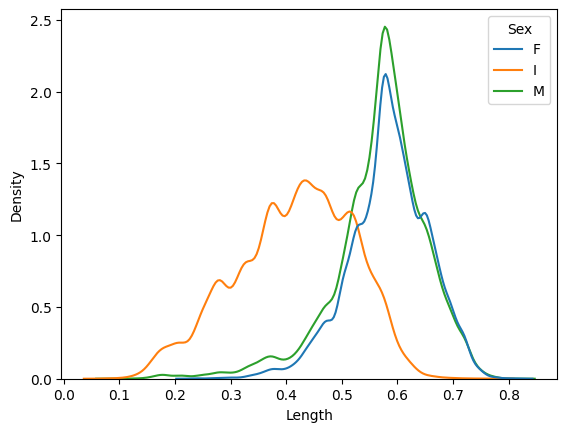

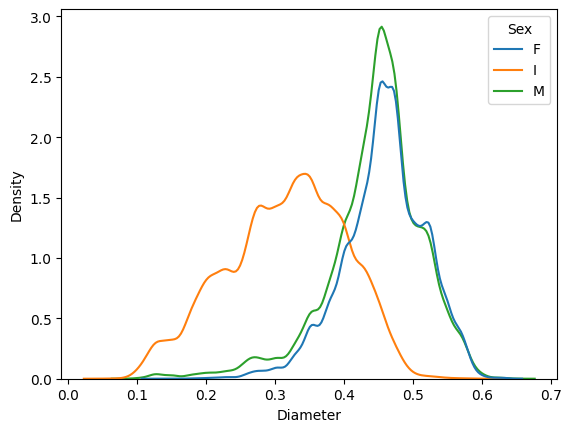

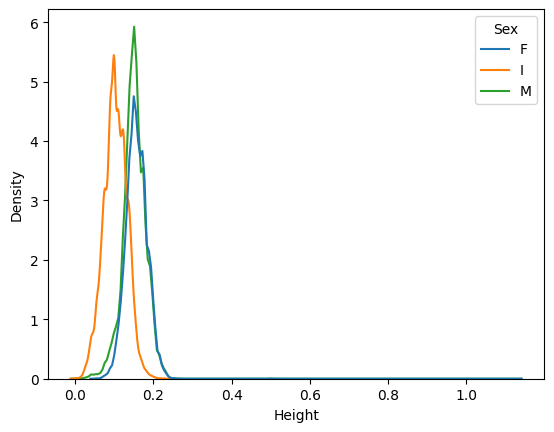

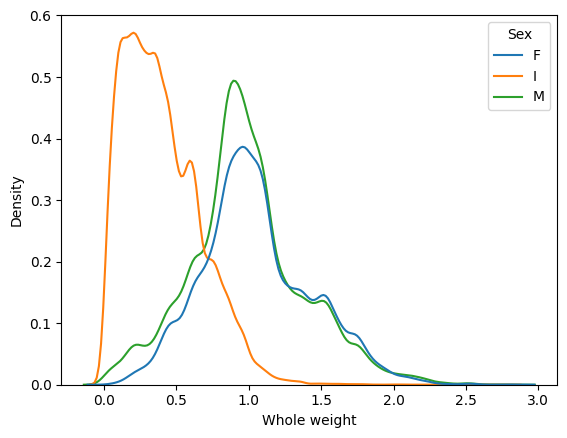

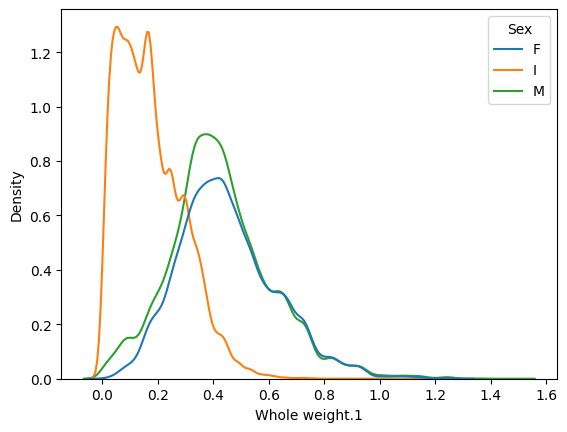

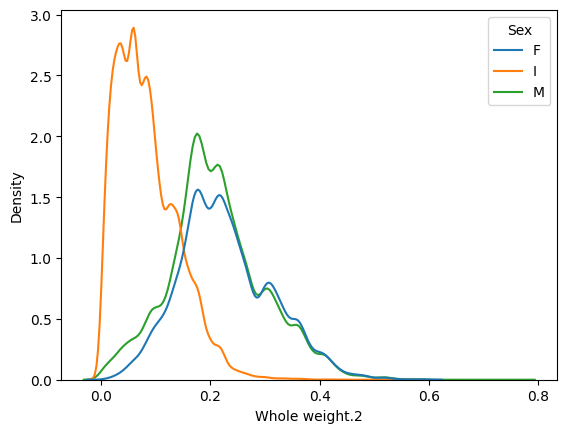

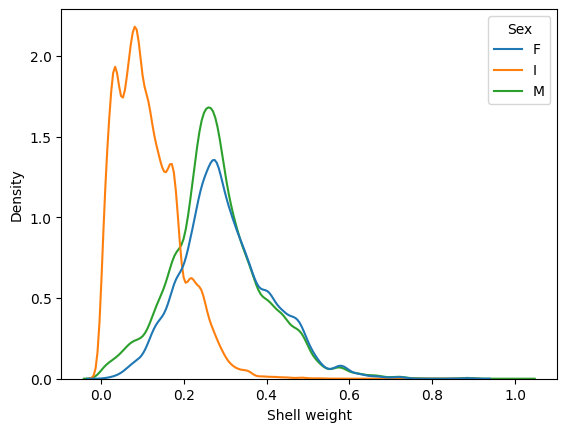

In [39]:
for col in numerical_cols:
    sns.kdeplot(data = df, x = col, hue = 'Sex')
    plt.show()

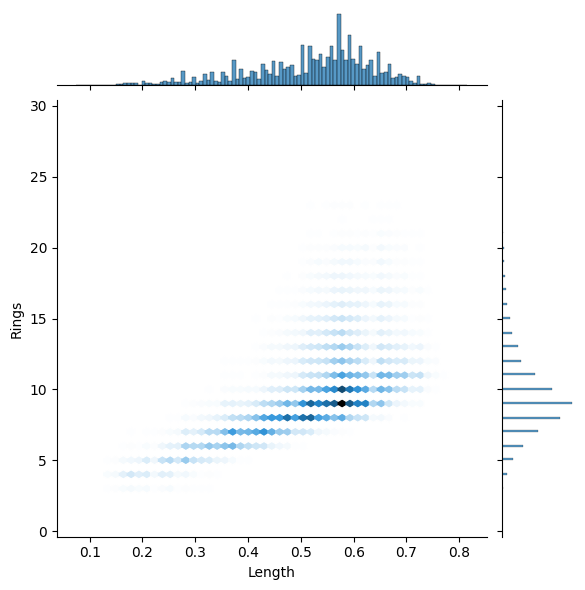

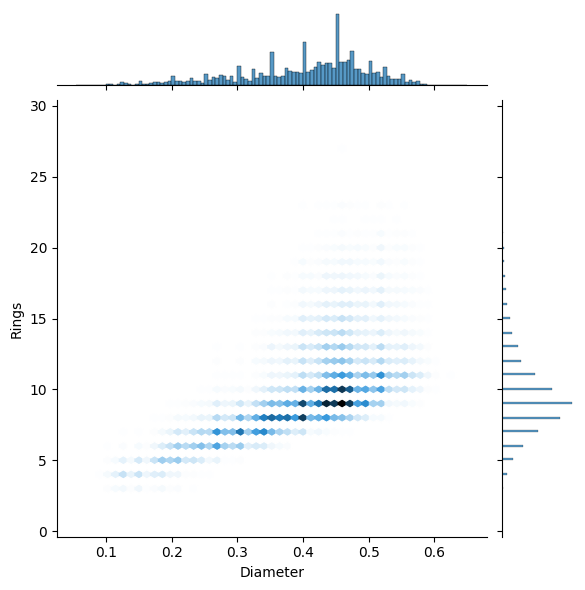

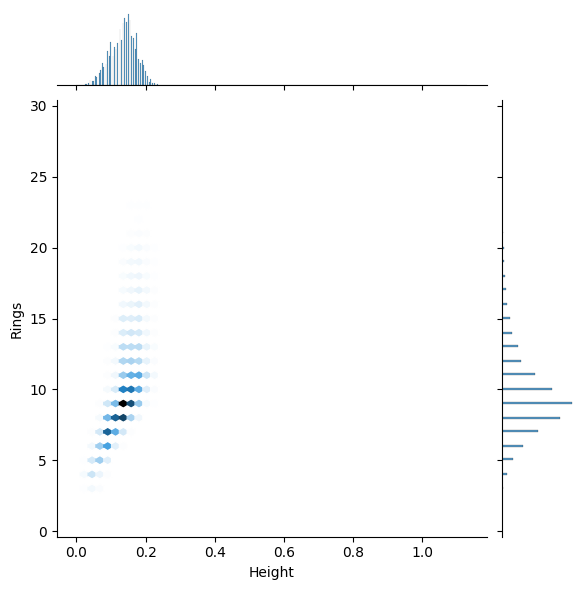

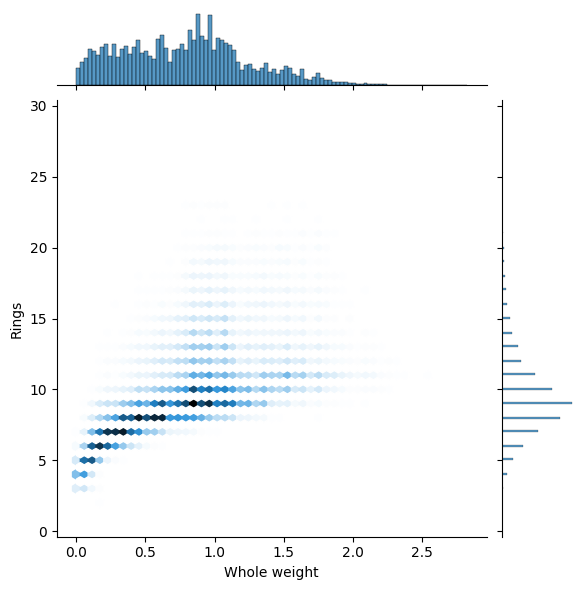

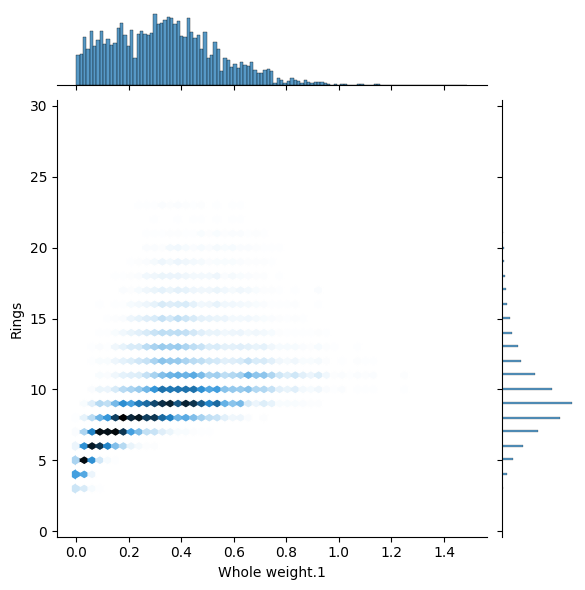

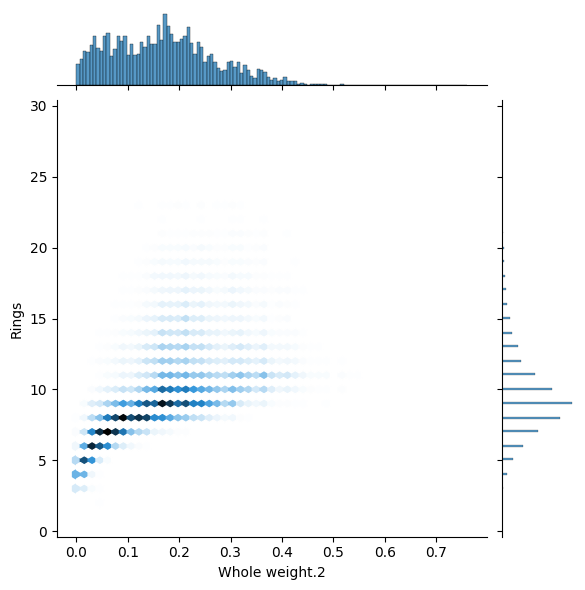

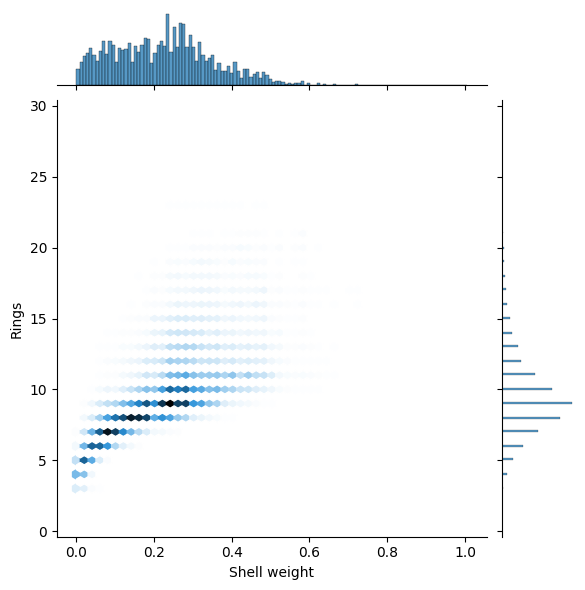

In [46]:
for col in numerical_cols:
    sns.jointplot(data = df, x = col, y = 'Rings', kind = 'hex')
    plt.show()

<AxesSubplot: >

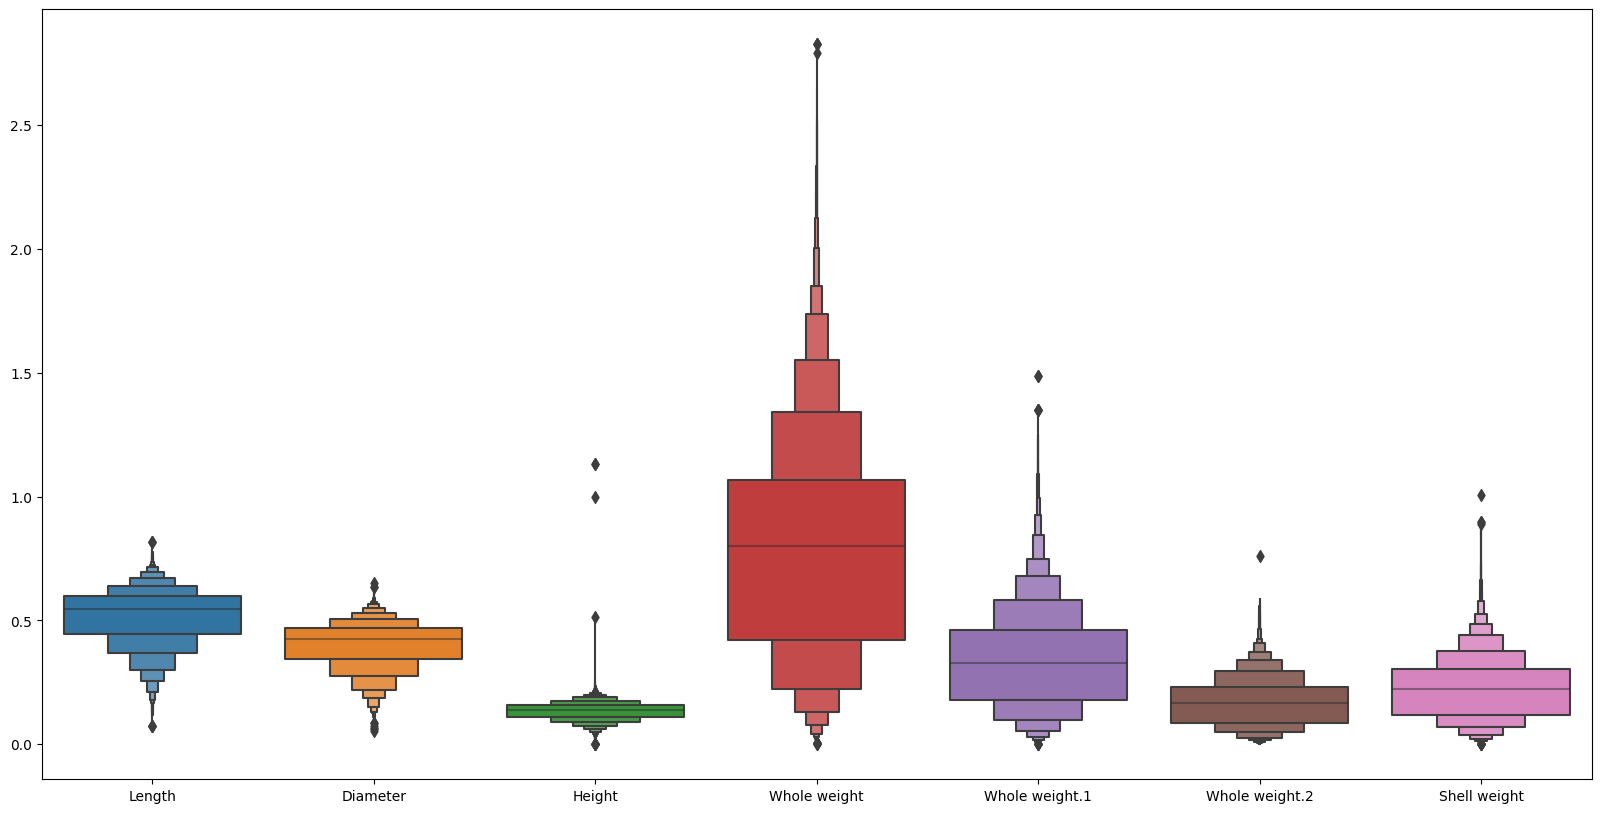

In [58]:
# boxplot of all columns 
plt.figure(figsize=(20, 10))
sns.boxenplot(data = df.drop(columns='Rings'))

<AxesSubplot: >

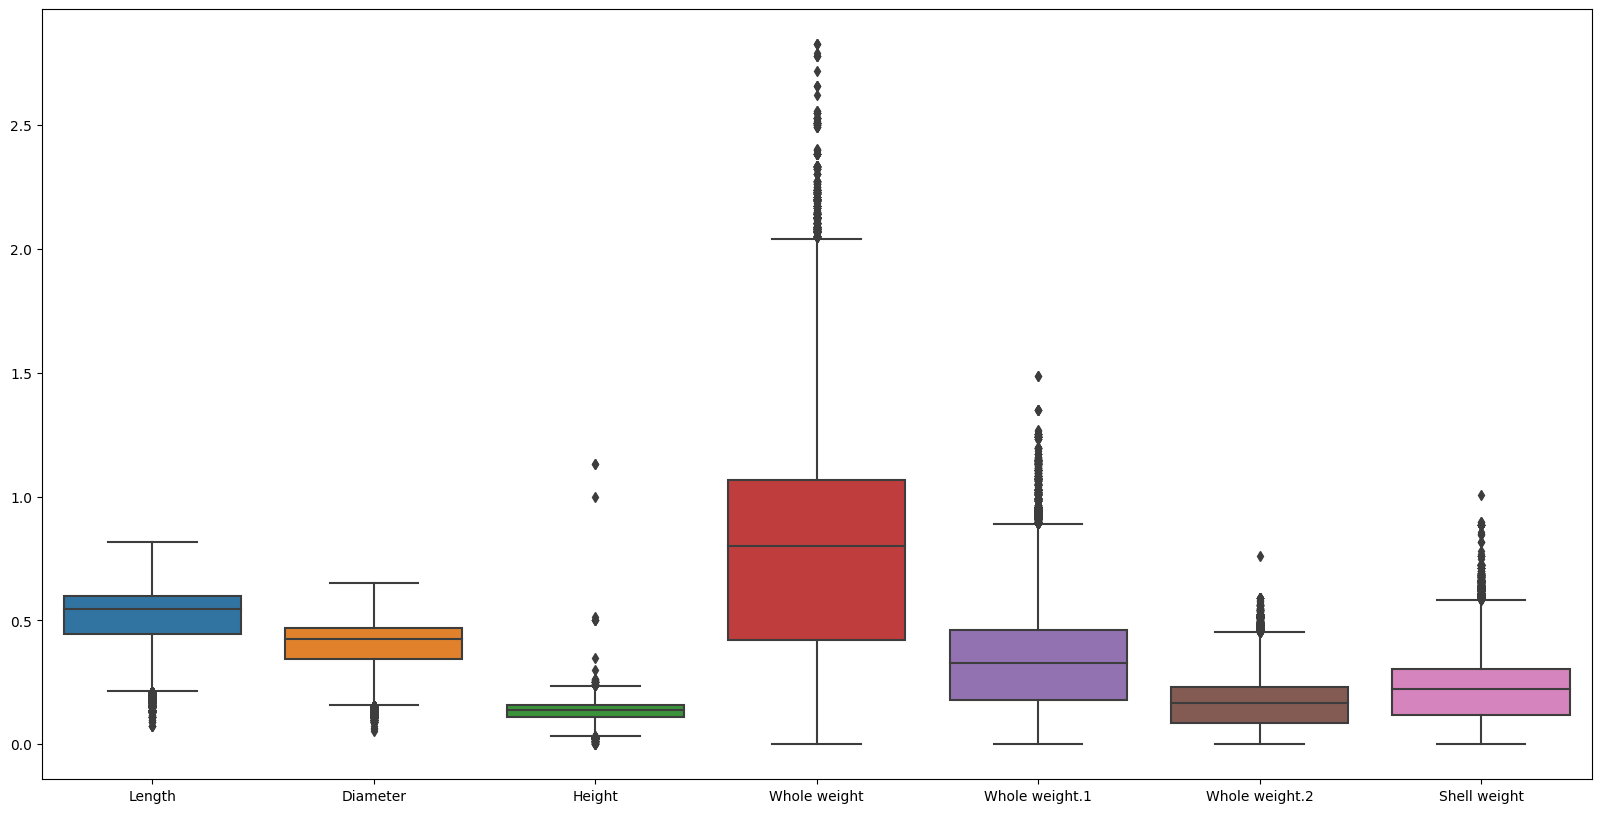

In [59]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df.drop(columns='Rings'))

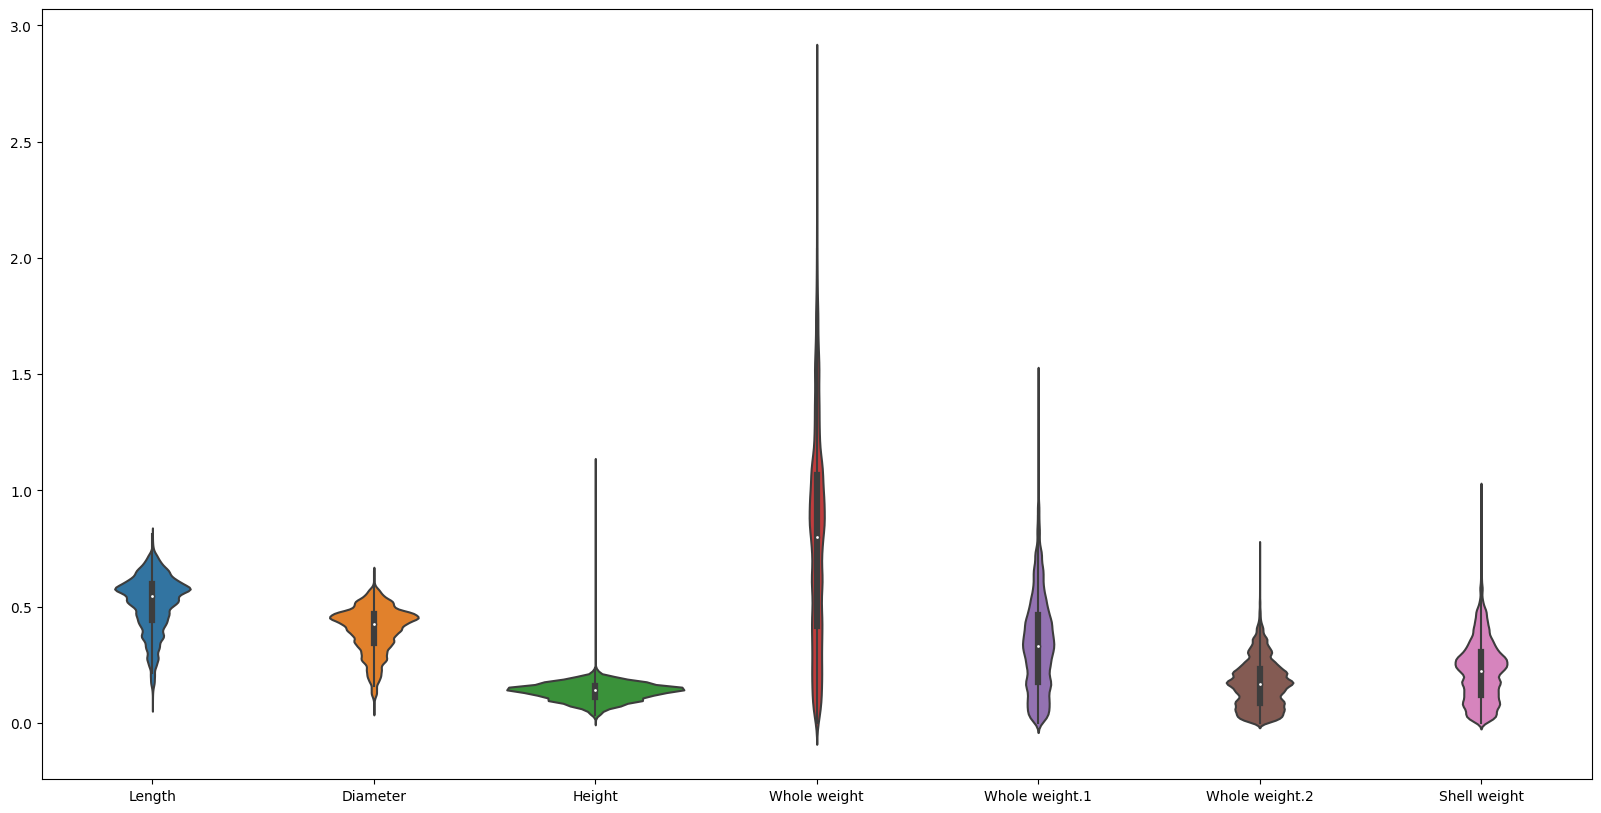

In [55]:
plt.figure(figsize=(20, 10))
sns.violinplot(data = df.drop(columns='Rings'))
plt.show()